## Задание 1

Описание задания:
Проведите очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

In [376]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [377]:
data_train = pd.read_csv('/Users/sofagusina/Desktop/программирование/machine_learning/machine_learning/ML/Работа с признаками/Проблема качества данных/train.csv')
data_test = pd.read_csv('/Users/sofagusina/Desktop/программирование/machine_learning/machine_learning/ML/Работа с признаками/Проблема качества данных/test.csv')



In [378]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [379]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [380]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [381]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [382]:
data_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

1. Обучение модели на дата-сете с удаленными пропущенными значениями

In [383]:
data_train_dropna = data_train.copy()
data_test_dropna = data_test.copy()




In [384]:

cols_to_exclude = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
data_train_dropna = data_train_dropna.loc[:, ~data_train_dropna.columns.isin(cols_to_exclude)]
data_test_dropna = data_test_dropna.loc[:, ~data_test_dropna.columns.isin(cols_to_exclude)]

In [472]:

data_train_dropna = data_train_dropna.dropna()
data_test_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 0 to 415
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Age          331 non-null    float64
 3   SibSp        331 non-null    int64  
 4   Parch        331 non-null    int64  
 5   Fare         331 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 18.1 KB


In [386]:
data_test_dropna = data_test_dropna.dropna()
data_test_dropna

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
409,1301,3,3.0,1,1,13.7750
411,1303,1,37.0,1,0,90.0000
412,1304,3,28.0,0,0,7.7750
414,1306,1,39.0,0,0,108.9000


In [387]:
from sklearn.model_selection import train_test_split

In [388]:
X = data_train_dropna[['Pclass','Age','SibSp','Parch','Fare']]
y = data_train_dropna['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_data_test = data_test_dropna[['Pclass','Age','SibSp','Parch','Fare']]

In [389]:
X_train.shape
Y_train.shape


(499,)

In [390]:
model = LogisticRegression()

In [391]:
model.fit(X_train,Y_train)

LogisticRegression()

In [392]:
print(f" Веса - {model.coef_}, смещениe - {model.intercept_}")

 Веса - [[-1.03652021 -0.04065179 -0.30913393  0.32216632  0.00678705]], смещениe - [2.87702372]


In [393]:
pred = model.predict(X_test)
predictions = model.predict_proba(X_test)

Визуализация работы модели

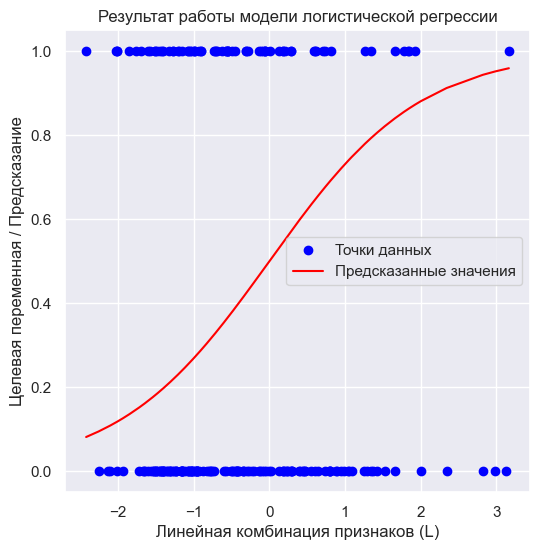

In [394]:
L = model.decision_function(X_test)# Линейная комбинация признаков
pred_linear_train = model.predict_proba(X_test)[:, 1]

# Сортируем по L для гладкой линии

sorted_idx = np.argsort(L)
L_sorted = L[sorted_idx]
pred_sorted = pred_linear_train[sorted_idx]
Y_sorted = y.to_numpy()[sorted_idx]

# Рисуем график
plt.figure(figsize=(6, 6))
plt.scatter(L_sorted, Y_sorted, color='blue', label='Точки данных')
plt.plot(L_sorted, pred_sorted, color='red', label='Предсказанные значения')
plt.xlabel('Линейная комбинация признаков (L)')
plt.ylabel('Целевая переменная / Предсказание')
plt.title('Результат работы модели логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()

Работа модели на тестовом наборе данных

In [395]:
pred_test = model.predict(X_data_test)

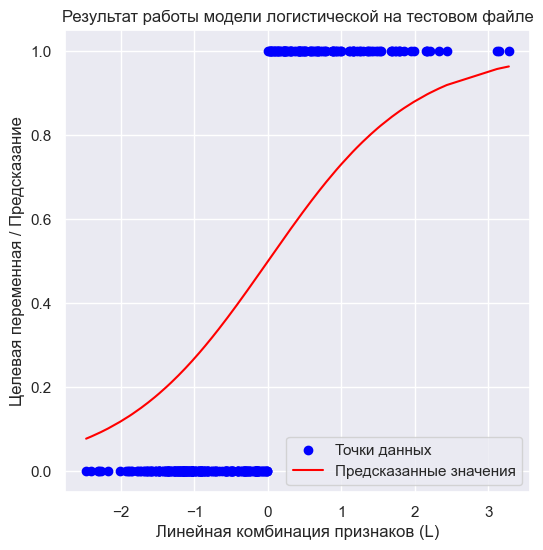

In [396]:
L = model.decision_function(X_data_test)# Линейная комбинация признаков
pred_linear = model.predict_proba(X_data_test)[:, 1]

# Сортируем по L для гладкой линии

sorted_idx = np.argsort(L)
L_sorted = L[sorted_idx]
pred_sorted = pred_linear[sorted_idx]
Y_sorted = pred_test[sorted_idx]

# Рисуем график
plt.figure(figsize=(6, 6))
plt.scatter(L_sorted, Y_sorted, color='blue', label='Точки данных')
plt.plot(L_sorted, pred_sorted, color='red', label='Предсказанные значения')
plt.xlabel('Линейная комбинация признаков (L)')
plt.ylabel('Целевая переменная / Предсказание')
plt.title('Результат работы модели логистической на тестовом файле')
plt.legend()
plt.grid(True)
plt.show()

Расчет метрик

In [397]:
from sklearn.metrics import recall_score, precision_score

In [398]:
model.score(X_test,Y_test)

0.6930232558139535

In [399]:
recall_score(Y_test,pred)

0.5

In [400]:
precision_score(Y_test,pred)

0.6818181818181818

0.7487555555555555

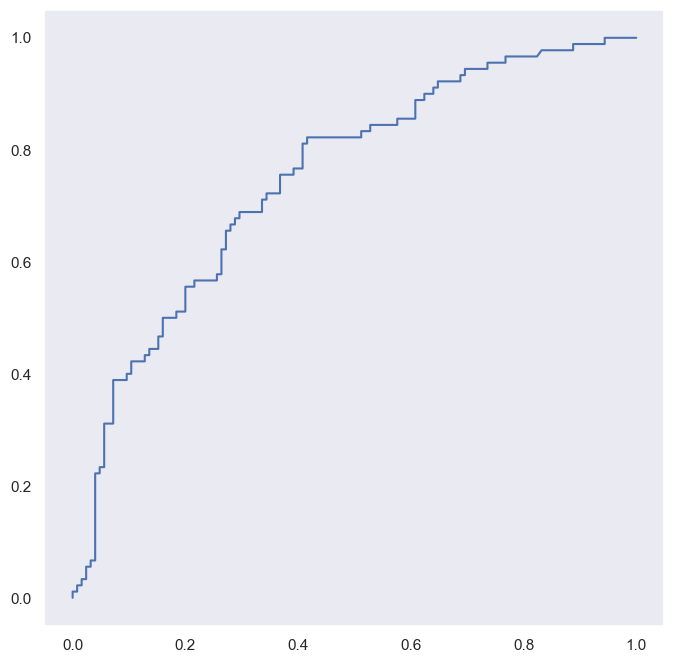

In [401]:
from sklearn.metrics import roc_curve
# получаем значения false и true positive rate для различных значений порога для класса 1
fpr, tpr, thres = roc_curve(Y_test, predictions[:, 1]) ## thres - пороговые значения



## строим кривую
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.grid()

## считаем площадь под кривой
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, predictions[:, 1])


Значения метрик получились очень низкими, что говорит о том, что удаление пропусков и категориальных данных влечет за собой плохую работу модели. 

Также плохую работу модели демонстрирует визуализация работы модели. 

In [402]:

x_min, x_max = X_train['Pclass'].min() - 1, X_train['Pclass'].max() + 1
y_min, y_max = X_train['Parch'].min() - 1, X_train['Parch'].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), 
                     np.linspace(y_min, y_max, 300))

SibSp = X_train['SibSp'].mean()
Age = X_train['Age'].mean()
Fare = X_train['Fare'].mean()
grid = np.c_[np.full(xx.ravel().shape, SibSp),np.full(xx.ravel().shape, Age),np.full(xx.ravel().shape, Fare), yy.ravel(), xx.ravel()]  # порядок: earconch, footlgth, taill

grid

array([[ 5.33066132e-01,  2.94595792e+01,  3.50586998e+01,
        -1.00000000e+00,  0.00000000e+00],
       [ 5.33066132e-01,  2.94595792e+01,  3.50586998e+01,
        -1.00000000e+00,  1.33779264e-02],
       [ 5.33066132e-01,  2.94595792e+01,  3.50586998e+01,
        -1.00000000e+00,  2.67558528e-02],
       ...,
       [ 5.33066132e-01,  2.94595792e+01,  3.50586998e+01,
         7.00000000e+00,  3.97324415e+00],
       [ 5.33066132e-01,  2.94595792e+01,  3.50586998e+01,
         7.00000000e+00,  3.98662207e+00],
       [ 5.33066132e-01,  2.94595792e+01,  3.50586998e+01,
         7.00000000e+00,  4.00000000e+00]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


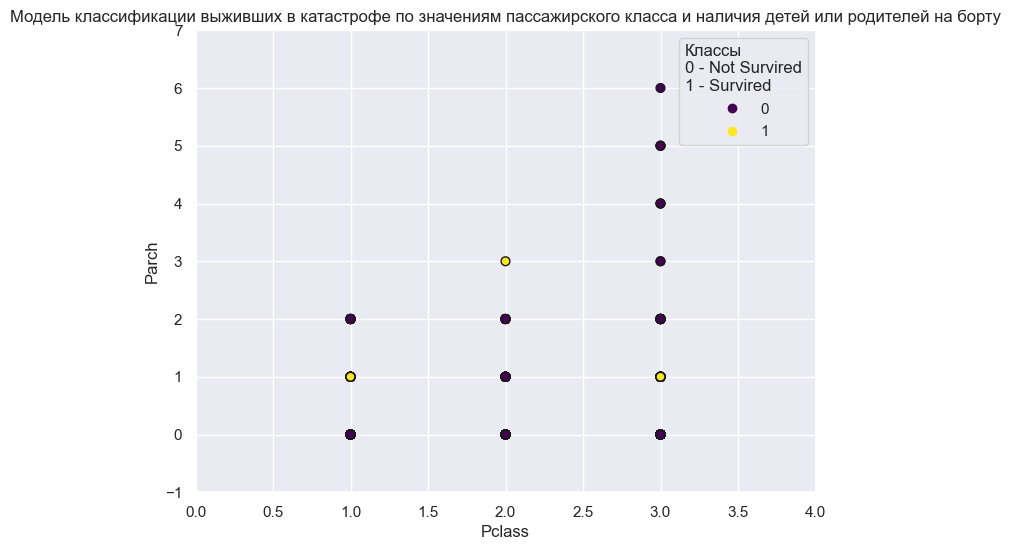

In [403]:

Z = model.predict_proba(grid)[:, 1]


Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))

scatter = plt.scatter(x=X_train['Pclass'], y=X_train['Parch'], c=Y_train, edgecolor='k', s=40, cmap='viridis')

plt.contour(xx, yy, Z, levels=[0.5], colors='black',)  # Линия, где p=0.5

plt.xlabel('Pclass')
plt.ylabel('Parch')
plt.title('Модель классификации выживших в катастрофе по значениям пассажирского класса и наличия детей или родителей на борту')
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Классы\n0 - Not Survired\n1 - Survired") 
plt.show()

Обучение модели на полных данных

In [404]:
data_train = data_train.copy()

In [405]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [406]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].median())
data_train['Embarked'] = data_train['Embarked'].fillna(data_train['Embarked'].mode()[0])


{'whiskers': [<matplotlib.lines.Line2D at 0x1760d1430>,
 'caps': [<matplotlib.lines.Line2D at 0x17604e1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1760d2600>],
 'medians': [<matplotlib.lines.Line2D at 0x17604ed50>],
 'fliers': [<matplotlib.lines.Line2D at 0x17604ef30>],
 'means': []}

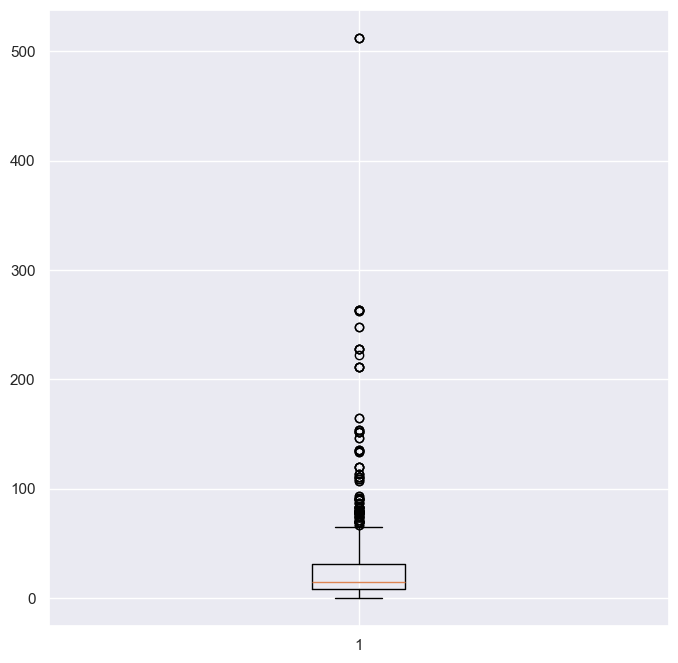

In [407]:
plt.boxplot(x=data_train['Fare'])

Выбросы в данных начинаются примерно при значении Fare > 85^, поэтому для заполнения пропусков в столбце Cabin сгруппируем данные на две группы: до 85 и больше 85. У пассажиров с ценой за каюту меньше 85, класса нет. У пассижиров со стоимостью > 85 - пропуск класса будет заменен модой.

In [408]:
data_train[data_train['Fare'] < 85]['Cabin'].isna().value_counts()

Cabin
True     677
False    148
Name: count, dtype: int64

In [409]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [410]:
mode = data_train.loc[data_train['Fare'] > 85, 'Cabin'].mode()[0]


data_train['Cabin'] = data_train.apply(
    lambda row: mode if pd.isna(row['Cabin']) and row['Fare'] > 85
    else 'No Cabin' if pd.isna(row['Cabin'])
    else row['Cabin'],
    axis=1
)

In [411]:
data_train[data_train['Fare'] < 85]['Cabin']

0      No Cabin
1           C85
2      No Cabin
3          C123
4      No Cabin
         ...   
886    No Cabin
887         B42
888    No Cabin
889        C148
890    No Cabin
Name: Cabin, Length: 825, dtype: object

In [412]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Проверка данных на наличие выбросов

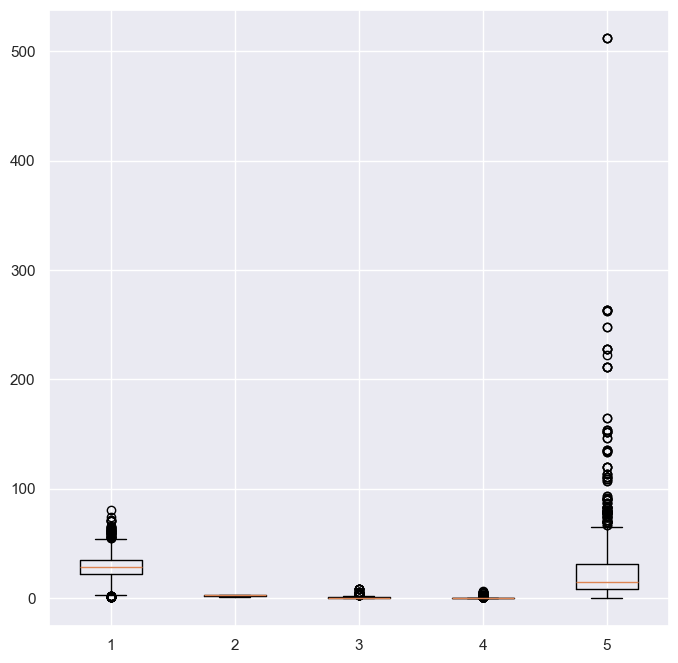

In [413]:
plt.boxplot(data_train[['Age','Pclass','SibSp','Parch','Fare']])
plt.show()


Больше всего выбросов наблюдатся в столбце Fare, но их удалять нецелесообразно, поскольку они имеют определенную корреляцию со столбцом Cabin

Опрделим, какие признаки в большей мере коррелируют с целевой переменной и есть ли сильная корреляция между признаками

<Axes: >

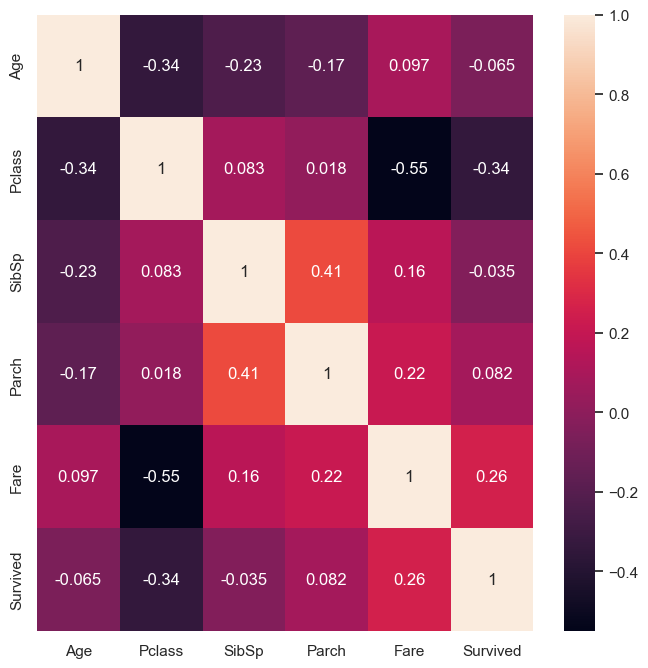

In [414]:
import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(data_train[['Age','Pclass','SibSp','Parch','Fare','Survived']].corr(), annot=True)

Переменная Survived в большей мере коррелирует с двумя признаками - тип класса и цена билета. Эти две переменные оставим в качестве количественного признака

В качестве категориальных признаков оставим номер каюты (только первую букву, которая в большей мере характеризует класс каюты) и пол (сделаем допущение, что мужчины имеют большую вероятность не остаться вживых, поскольку будут пытаться спасти женщин - это всего лишь допущение)

In [415]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_train['Sex'])

data_train['Sex_encod'] = le.transform(data_train['Sex'])



In [416]:
data_train['Cabin_encod'] = data_train['Cabin'].str[0]

le.fit(data_train['Cabin_encod'])
data_train['Cabin_encod'] = le.transform(data_train['Cabin_encod'])

data_train['Cabin_encod']

0      7
1      2
2      7
3      2
4      7
      ..
886    7
887    1
888    7
889    2
890    7
Name: Cabin_encod, Length: 891, dtype: int64

Подготовка переменных и обучение модели

In [417]:
X_1 = data_train[['Pclass','Fare','Cabin_encod','Sex_encod']]
y_1 = data_train['Survived']
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=0)



In [418]:
model_1 = LogisticRegression()
model_1.fit(X_train_1,Y_train_1)

LogisticRegression()

In [419]:
print(f" Веса - {model_1.coef_}, смещениe - {model_1.intercept_}")

 Веса - [[-7.74043388e-01  4.00928914e-04 -4.74728640e-02 -2.48187681e+00]], смещениe - [3.07715205]


In [420]:
pred_1 = model_1.predict(X_test_1)


Расчет метрик

In [427]:
model_1.score(X_test_1,Y_test_1)

0.7873134328358209

In [428]:
recall_score(Y_test_1,pred_1)

0.71

In [429]:
precision_score(Y_test_1,pred_1)

0.7171717171717171

0.8499702380952381

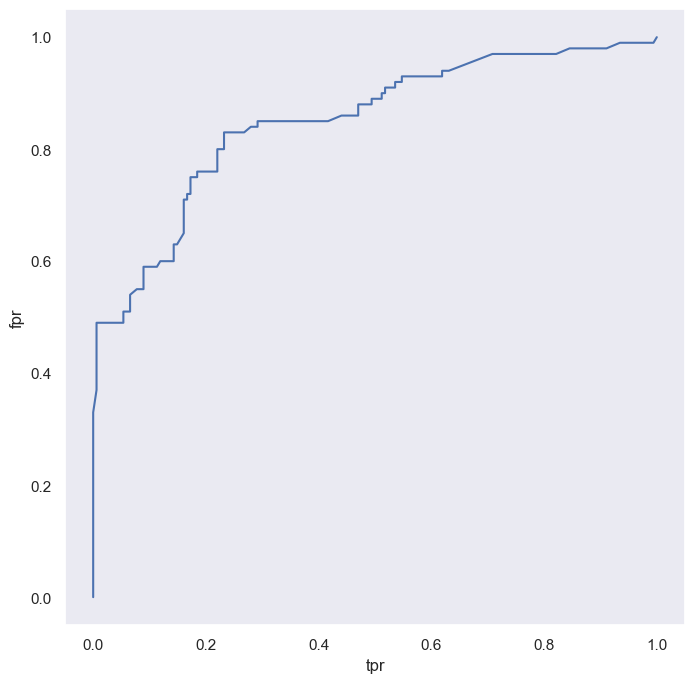

In [440]:
predictions_1 = model_1.predict_proba(X_test_1)

fpr_1, tpr_1, thres_1 = roc_curve(Y_test_1, predictions_1[:, 1]) ## thres - пороговые значения

## строим кривую

plt.plot(fpr_1, tpr_1)
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.grid()

## считаем площадь под кривой

roc_auc_score(Y_test_1, predictions_1[:, 1])

Метрики значительно повысились. 

Выполним визуализацию модели 

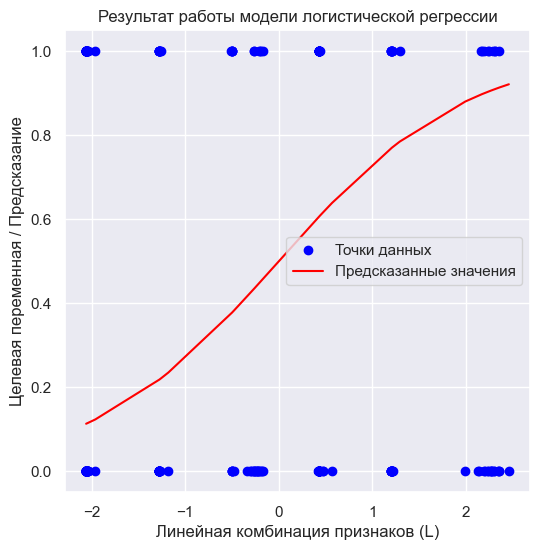

In [441]:
L = model_1.decision_function(X_test_1)# Линейная комбинация признаков
pred_linear_train_1 = model_1.predict_proba(X_test_1)[:, 1]
pred_linear_train_1
# Сортируем по L для гладкой линии

sorted_idx_1 = np.argsort(L)
L_sorted_1 = L[sorted_idx]
pred_sorted_1 = pred_linear_train_1[sorted_idx]
Y_sorted_1 = y_1.to_numpy()[sorted_idx]

# Рисуем график
plt.figure(figsize=(6, 6))
plt.scatter(L_sorted_1, Y_sorted_1, color='blue', label='Точки данных')
plt.plot(L_sorted_1, pred_sorted_1, color='red', label='Предсказанные значения')
plt.xlabel('Линейная комбинация признаков (L)')
plt.ylabel('Целевая переменная / Предсказание')
plt.title('Результат работы модели логистической регрессии')
plt.legend()
plt.grid(True)
plt.show()

Посмотрим предсказания модели на тестовом файле


In [463]:
mode = data_test.loc[data_test['Fare'] > 85, 'Cabin'].mode()[0]


data_test['Cabin'] = data_test.apply(
    lambda row: mode if pd.isna(row['Cabin']) and row['Fare'] > 85
    else 'No Cabin' if pd.isna(row['Cabin'])
    else row['Cabin'],
    axis=1
)
data_test['Age'] = data_test['Age'].fillna(data_test['Age'].median())
data_test['Embarked'] = data_test['Embarked'].fillna(data_test['Embarked'].mode()[0])
data_test['Fare'] = data_test['Fare'].fillna(data_test['Fare'].median())

In [464]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Sex_encod    418 non-null    int64  
 12  Cabin_encod  418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [465]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data_test['Sex'])

data_test['Sex_encod'] = le.transform(data_test['Sex'])




In [466]:
data_test['Cabin_encod'] = data_test['Cabin'].str[0]

le.fit(data_test['Cabin_encod'])
data_test['Cabin_encod'] = le.transform(data_test['Cabin_encod'])



In [467]:
X_data_test_1 = data_test[['Pclass','Fare','Cabin_encod','Sex_encod']]

In [469]:
pred_test_csv = model_1.predict(X_data_test_1)

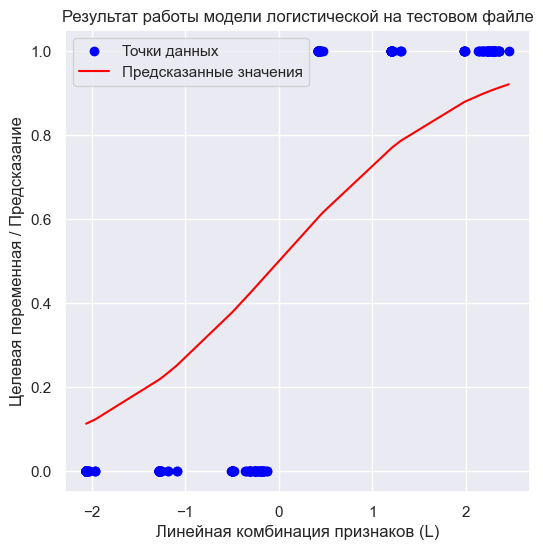

In [471]:
L = model_1.decision_function(X_data_test_1)# Линейная комбинация признаков
pred_linear = model_1.predict_proba(X_data_test_1)[:, 1]

# Сортируем по L для гладкой линии

sorted_idx = np.argsort(L)
L_sorted = L[sorted_idx]
pred_sorted = pred_linear[sorted_idx]
Y_sorted = pred_test_csv[sorted_idx]

# Рисуем график
plt.figure(figsize=(6, 6))
plt.scatter(L_sorted, Y_sorted, color='blue', label='Точки данных')
plt.plot(L_sorted, pred_sorted, color='red', label='Предсказанные значения')
plt.xlabel('Линейная комбинация признаков (L)')
plt.ylabel('Целевая переменная / Предсказание')
plt.title('Результат работы модели логистической на тестовом файле')
plt.legend()
plt.grid(True)
plt.show()

Выводы о проделанной работе: в ходе работы были обучены две модели логистической регрессии для классификации пассажиров на две группы: выживших и не выживших в ходе крушения корабля "Титаник". Было выяснено, что модель, обученная на данных, в которых были удалены пропуски, и, следовательно, уменьшено количество данных (примерно в 2,5 раза), ошибалась гораздо сильнее, о чем говорит значение метрики recall в 50 процентов. Модель же, в которой количество данных удалось сохранить с помощью работы с пропусками (замены их медианами по столбцам и модой по группе), имела метрику recall  в 71 процент. Разумеется, 71 процент - не самый высокий показатель метрики, но для предоставленных данных он является оптимальным, поскольку нет каких-то конкретных признаков, которые имели бы высокую корреляцию с целевой переменной, а, следовательно, нельзя сказать, что модель "хорошо" обучилась на этих данных. 